# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 602


['chuy',
 'kadykchan',
 'grindavik',
 'georgetown',
 'ponta do sol',
 'geraldton',
 'mataura',
 'ende',
 'vaini',
 'flin flon',
 'palabuhanratu',
 'malwan',
 'saskylakh',
 'quepos',
 'sision',
 'svetlyy',
 'butaritari',
 'ivankiv',
 'hermanus',
 'belushya guba',
 'jamestown',
 'clyde river',
 'tiksi',
 'tagbilaran',
 'zhob',
 'kaeo',
 'codrington',
 'deputatskiy',
 'ribeira grande',
 'erdenet',
 'kidal',
 'qaanaaq',
 'sayyan',
 'bluff',
 'rikitea',
 'vrangel',
 'new norfolk',
 'provideniya',
 'victoria',
 'bakchar',
 'port alfred',
 'vestmannaeyjar',
 'thompson',
 'severo-kurilsk',
 'ushuaia',
 'lavrentiya',
 'conceicao do araguaia',
 'castro',
 'illoqqortoormiut',
 'kaitangata',
 'padang',
 'tasiilaq',
 'guerrero negro',
 'khatanga',
 'toliary',
 'anaconda',
 'avarua',
 'upernavik',
 'hilo',
 'conakry',
 'bhola',
 'shenjiamen',
 'borovskoy',
 'busselton',
 'khani',
 'tunceli',
 'brewster',
 'atuona',
 'vaitupu',
 'barentsburg',
 'igarka',
 'roebourne',
 'albany',
 'nikolskoye',
 'tapa

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 3 of Set 1 | grindavik
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | ende
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | flin flon
Processing Record 11 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 12 of Set 1 | malwan
City not found. Skipping...
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | quepos
Processing Record 15 of Set 1 | sision
City not found. Skipping...
Processing Record 16 of Set 1 | svetlyy
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | ivankiv
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | belushya guba
City not found

In [4]:
#city_data
#Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE
#city_data_df
# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.6971,-53.4616,76.23,54,0,16.46,UY,1675537303
1,grindavik,63.8424,-22.4338,36.07,75,75,19.57,IS,1675537343
2,georgetown,5.4112,100.3354,76.98,94,20,0.00,MY,1675537343
3,ponta do sol,32.6667,-17.1000,63.23,64,5,9.22,PT,1675537344
4,geraldton,-28.7667,114.6000,72.01,88,100,9.22,AU,1675537345


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chuy,-33.6971,-53.4616,76.23,54,0,16.46,UY,1675537303
1,grindavik,63.8424,-22.4338,36.07,75,75,19.57,IS,1675537343
2,georgetown,5.4112,100.3354,76.98,94,20,0.00,MY,1675537343
3,ponta do sol,32.6667,-17.1000,63.23,64,5,9.22,PT,1675537344
4,geraldton,-28.7667,114.6000,72.01,88,100,9.22,AU,1675537345


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

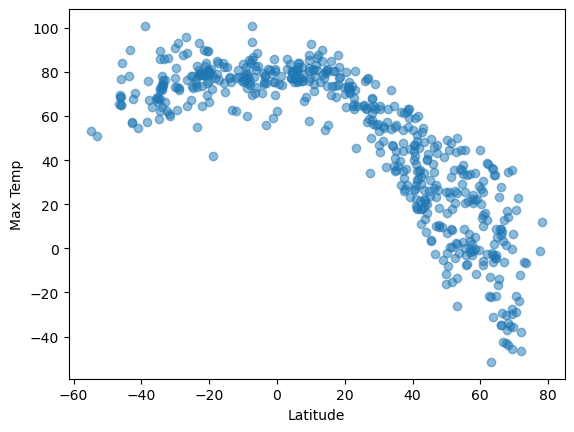

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
latitude = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
# Incorporate the other graph properties
plt.scatter(latitude, max_temp, linewidths=1, marker="o",alpha=.5)
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

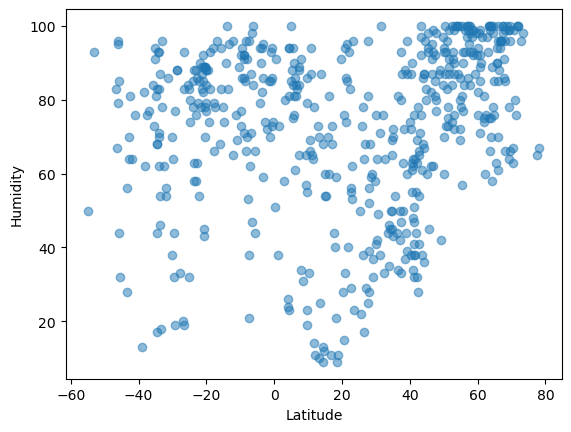

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

Humidity = city_data_df["Humidity"]
# Incorporate the other graph properties
plt.scatter(latitude, Humidity, linewidths=1, marker="o",alpha=.5)
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

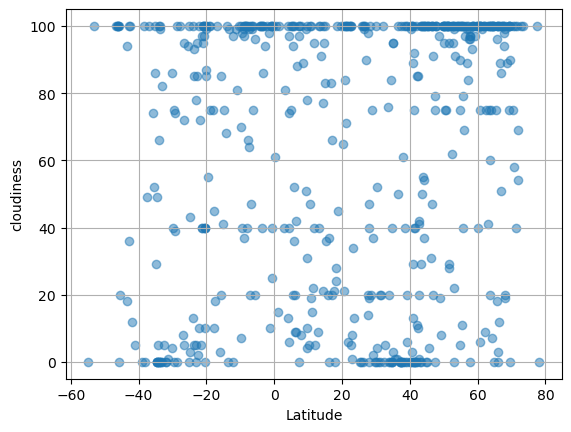

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
cloudiness = city_data_df["Cloudiness"]
# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, linewidths=1, marker="o",alpha=.5)
plt.ylabel("cloudiness")
plt.xlabel("Latitude")
plt.grid(True,"major")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

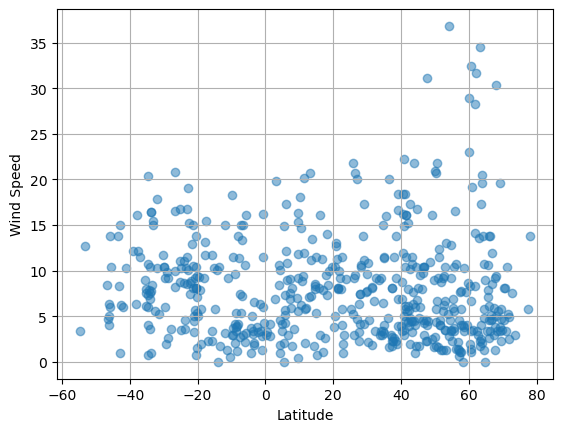

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
Wind_Speed = city_data_df["Wind Speed"]
# Incorporate the other graph properties
plt.scatter(latitude, Wind_Speed, linewidths=1, marker="o",alpha=.5)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True,"major")


# Save the figure
plt.savefig("Fig5.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regression(x_val, y_val, title, y_label,text_xy):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_val, y_val)
    regressiom = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_txt=str(r_value)
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regressiom,"r")
    plt.annotate(line_eq,text_xy,fontsize=15, color="red")
    plt.title(title+"            r= "+r_txt)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grindavik,63.8424,-22.4338,36.07,75,75,19.57,IS,1675537343
2,georgetown,5.4112,100.3354,76.98,94,20,0.00,MY,1675537343
3,ponta do sol,32.6667,-17.1000,63.23,64,5,9.22,PT,1675537344
8,flin flon,54.7682,-101.8650,3.04,72,100,3.44,CA,1675537350
9,saskylakh,71.9167,114.0833,-46.71,100,69,2.48,RU,1675537350


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chuy,-33.6971,-53.4616,76.23,54,0,16.46,UY,1675537303
4,geraldton,-28.7667,114.6000,72.01,88,100,9.22,AU,1675537345
5,mataura,-46.1927,168.8643,68.52,79,100,5.03,NZ,1675537346
6,ende,-8.8432,121.6623,77.36,91,100,4.21,ID,1675537348
7,vaini,-21.2000,-175.2000,78.96,89,40,8.05,TO,1675537287


###  Temperature vs. Latitude Linear Regression Plot

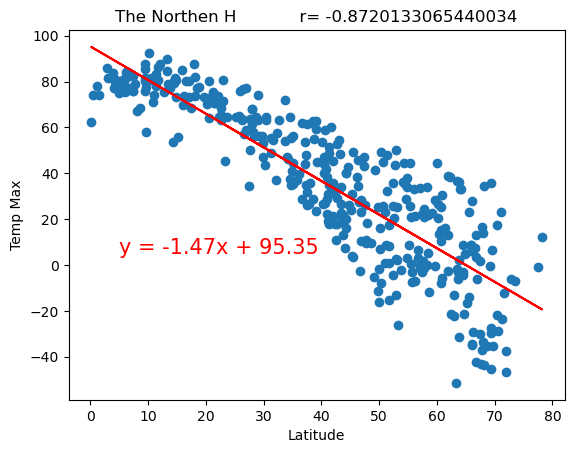

In [15]:
# Linear regression on Northern Hemisphere

x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]

lin_regression(x_val,y_val,"The Northen H","Temp Max",(5,5))


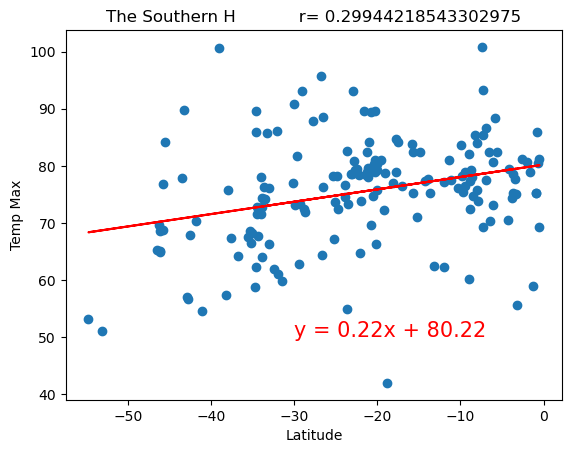

In [16]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]

lin_regression(x_val,y_val,"The Southern H","Temp Max",(-30,50))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

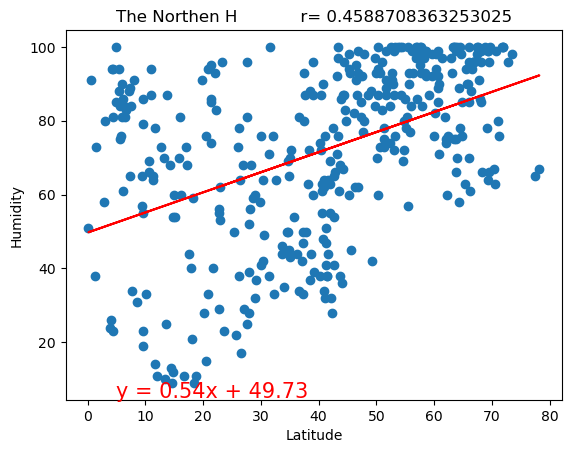

In [17]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Humidity"]

lin_regression(x_val,y_val,"The Northen H","Humidity",(5,5))


# YOUR CODE HERE

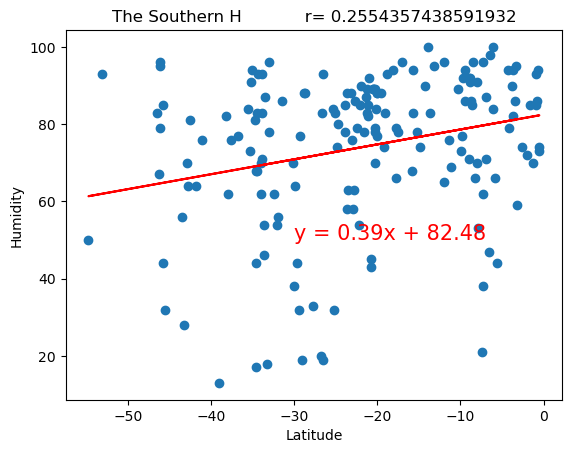

In [18]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Humidity"]

lin_regression(x_val,y_val,"The Southern H","Humidity",(-30,50))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

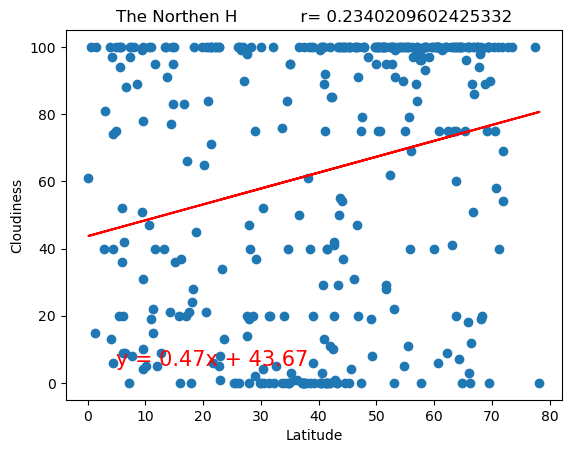

In [19]:
# Northern Hemisphere

x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Cloudiness"]

lin_regression(x_val,y_val,"The Northen H","Cloudiness",(5,5))
# YOUR CODE HERE

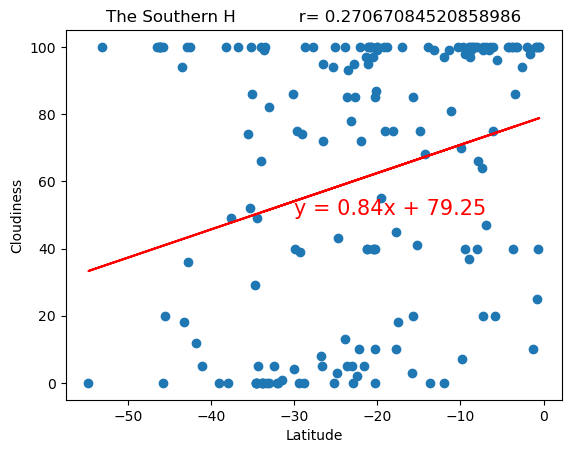

In [20]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Cloudiness"]

lin_regression(x_val,y_val,"The Southern H","Cloudiness",(-30,50))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

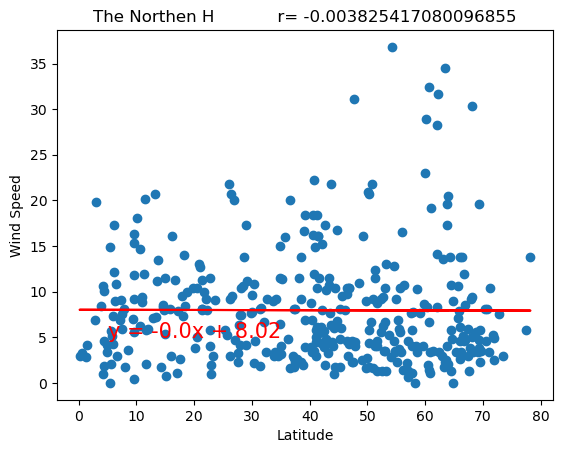

In [21]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Wind Speed"]

lin_regression(x_val,y_val,"The Northen H","Wind Speed",(5,5))
# YOUR CODE HERE

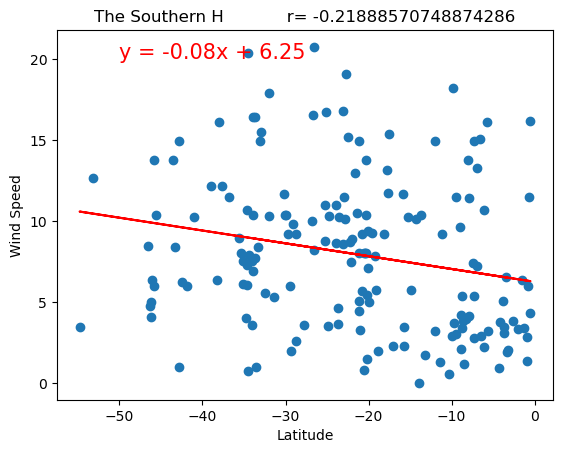

In [22]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Wind Speed"]

lin_regression(x_val,y_val,"The Southern H","Wind Speed",(-50,20))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE